In [9]:
import sys
sys.path.append("/home/zhhu/workspaces/deepinv/")

In [10]:
import torch

# Define the function f(x) = x^2 + 4x + 4
def func(x):
    return x**2 + 4*x + 4

# Initialize x as a tensor with requires_grad=True to enable gradient computation
x = torch.tensor([0.0], requires_grad=True)

# Initialize the Adam optimizer with learning rate
optimizer = torch.optim.Adam([x], lr=1)

# Optimization loop
for i in range(1000):
    optimizer.zero_grad()  # Reset gradients to zero
    loss = func(x)         # Calculate the loss (function value)
    loss.backward()        # Compute gradients
    optimizer.step()       # Update x using the Adam optimizer
    
    print(f"Step {i+1}, x = {x.item()}, f(x) = {loss.item()}")


Step 1, x = -0.9999998807907104, f(x) = 4.0
Step 2, x = -1.9321794509887695, f(x) = 1.000000238418579
Step 3, x = -2.671809196472168, f(x) = 0.004599571228027344
Step 4, x = -3.0846457481384277, f(x) = 0.4513278007507324
Step 5, x = -3.170950412750244, f(x) = 1.1764564514160156
Step 6, x = -3.022181987762451, f(x) = 1.3711252212524414
Step 7, x = -2.72762393951416, f(x) = 1.044856071472168
Step 8, x = -2.358445167541504, f(x) = 0.5294365882873535
Step 9, x = -1.9765149354934692, f(x) = 0.12848281860351562
Step 10, x = -1.6393240690231323, f(x) = 0.0005514621734619141
Step 11, x = -1.3948049545288086, f(x) = 0.13008713722229004
Step 12, x = -1.270544409751892, f(x) = 0.36626100540161133
Step 13, x = -1.269128680229187, f(x) = 0.5321054458618164
Step 14, x = -1.3736451864242554, f(x) = 0.5341730117797852
Step 15, x = -1.5561895370483398, f(x) = 0.3923203945159912
Step 16, x = -1.7836012840270996, f(x) = 0.19696784019470215
Step 17, x = -2.0206096172332764, f(x) = 0.046828508377075195
Ste

In [11]:
import random
import sys

import matplotlib
import numpy as np
import pandas as pd
import torch

from deepinv.optim.phase_retrieval import plot_error_bars

In [11]:
import matplotlib.font_manager as fm
fm._get_fontconfig_fonts.cache_clear()

In [2]:
import matplotlib.font_manager as fm

# Replace with the actual path from fc-list output
font_path = "/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf"
fm.fontManager.addfont(font_path)

# Verify it's been added
font_names = [f.name for f in fm.fontManager.ttflist]
print([f for f in font_names if 'times' in f.lower()])

['Times New Roman']


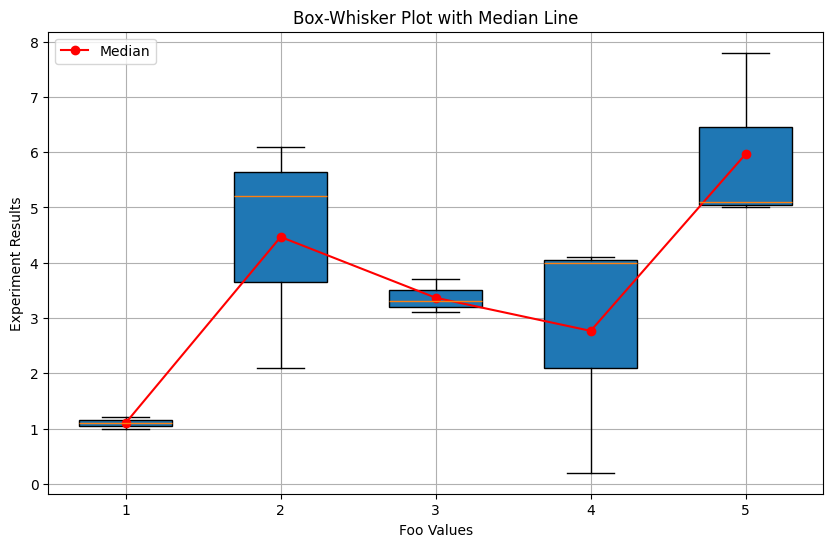

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
foo = pd.Series([1, 2, 3, 4, 5])
bar = pd.DataFrame({
    'Exp1': [1.1, 2.1, 3.7, 4.1, 5.0],
    'Exp2': [1.2, 6.1, 3.3, 0.2, 5.1],
    'Exp3': [1.0, 5.2, 3.1, 4.0, 7.8],
})

# Create the box-whisker plot
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(bar.values.T, positions=foo, widths=0.6, patch_artist=True)

# Calculate the medians for each row in 'bar'
medians = bar.mean(axis=1)

# Overlay the median line plot
plt.plot(foo, medians, color='red', marker='o', linestyle='-', label='Median')

# Customize the plot
plt.xlabel('Foo Values')
plt.ylabel('Experiment Results')
plt.title('Box-Whisker Plot with Median Line')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [ ]:
# block for configuring random seed

random_seed = 50501
if random_seed is None:
    random_seed = random.randrange(2**16)
    print("No initial random seed given, generated one:", random_seed)

random.seed(random_seed)
np.random.seed(random_seed)
torch.manual_seed(random_seed)

print(random.randint(1, 100))
print(np.random.randint(1, 100))
print(torch.randint(1, 100, (1,)))

91
99
tensor([35])


In [ ]:
torch.cat((torch.arange(0.1,4.1,0.1),torch.arange(4.2,9.2,0.4)))

tensor([0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000, 0.9000,
        1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000, 1.8000,
        1.9000, 2.0000, 2.1000, 2.2000, 2.3000, 2.4000, 2.5000, 2.6000, 2.7000,
        2.8000, 2.9000, 3.0000, 3.1000, 3.2000, 3.3000, 3.4000, 3.5000, 3.6000,
        3.7000, 3.8000, 3.9000, 4.0000, 4.2000, 4.6000, 5.0000, 5.4000, 5.8000,
        6.2000, 6.6000, 7.0000, 7.4000, 7.8000, 8.2000, 8.6000, 9.0000])

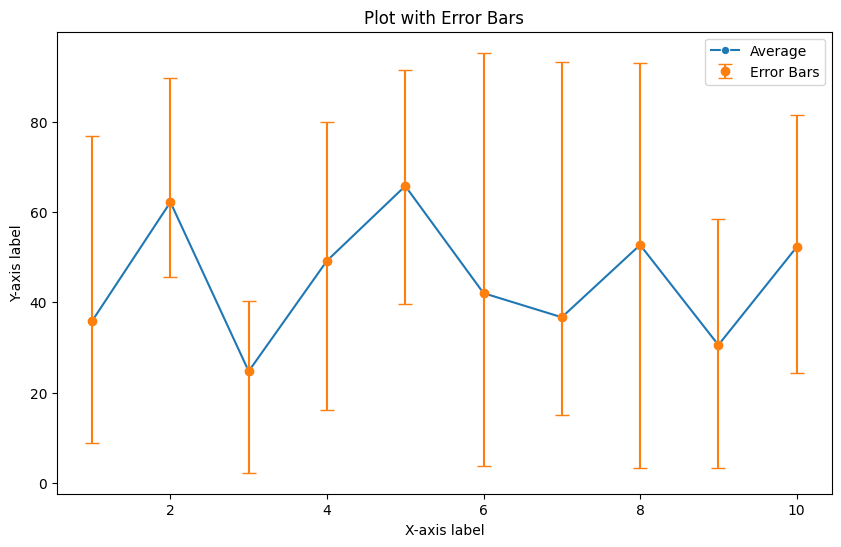

In [ ]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample two-dimensional tensor
torch.manual_seed(0)
data = torch.rand(10, 5) * 100  # 10 data points, each with 5 values

# Calculate statistics
min_vals = data.min(dim=1).values.numpy()
max_vals = data.max(dim=1).values.numpy()
avg_vals = data.mean(dim=1).numpy()

# Calculate error bars
yerr_lower = avg_vals - min_vals
yerr_upper = max_vals - avg_vals

# Prepare data for plotting
df = pd.DataFrame({
    'x': range(1, len(avg_vals) + 1),
    'avg': avg_vals,
    'yerr_lower': yerr_lower,
    'yerr_upper': yerr_upper
})

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df, x='x', y='avg', marker='o', label='Average')

# Adding error bars
ax.errorbar(df['x'], df['avg'], yerr=[df['yerr_lower'], df['yerr_upper']], fmt='o', capsize=5, label='Error Bars')

# Adding labels and title
ax.set_xlabel('X-axis label')
ax.set_ylabel('Y-axis label')
ax.set_title('Plot with Error Bars')
ax.legend()

# Show plot
plt.show()


In [ ]:
def plot_error_bars(oversamplings,data,title='Performance'):
    
    # Calculate statistics
    min_vals = data.min(dim=1).numpy()
    max_vals = data.max(dim=1).numpy()
    avg_vals = data.mean(dim=1).numpy()

    # Calculate error bars
    yerr_lower = avg_vals - min_vals
    yerr_upper = max_vals - avg_vals

    # Prepare data for plotting
    df = pd.DataFrame({
        'x': oversamplings,
        'avg': avg_vals,
        'yerr_lower': yerr_lower,
        'yerr_upper': yerr_upper
    })

    # Plotting
    plt.figure(figsize=(10, 6))
    ax = sns.lineplot(data=df, x='x', y='avg', marker='o', label='Average')

    # Adding error bars
    ax.errorbar(df['x'], df['avg'], yerr=[df['yerr_lower'], df['yerr_upper']], fmt='o', capsize=5, label='Error Bars')

    # Adding labels and title
    ax.set_xlabel('Oversampling Ratio')
    ax.set_ylabel('Consine Similarity')
    ax.set_title(title)
    ax.legend()

    # Show plot
    plt.show()

# Understanding pandas.DataFrame

In [ ]:
df = pd.DataFrame({'oversampling': torch.arange(1.0, 3.1, 0.1), **{f'test{i}': None for i in range(100)}})

In [ ]:
for i in range(100):
    for j in range(df.shape[0]):
        df.loc[j,f'test{i}'] = torch.rand(()).numpy()

df

,oversampling,test0,test1,test2,test3,test4,test5,test6,test7,test8,...,test90,test91,test92,test93,test94,test95,test96,test97,test98,test99
0,1.0,0.6053134,0.17879152,0.70807683,0.682132,0.5370733,0.645671,0.7877872,0.6340561,0.044927895,...,0.9324739,0.3450665,0.55136615,0.21409953,0.6652837,0.7984545,0.3732348,0.32719743,0.80747527,0.411413
1,1.1,0.7781114,0.23848265,0.76488256,0.48982114,0.0063943267,0.8561675,0.299263,0.089736044,0.5925115,...,0.40891176,0.52392316,0.10672146,0.5522628,0.5365326,0.65468526,0.94249606,0.9910706,0.9312298,0.5126226
2,1.2,0.9089494,0.80469996,0.24342912,0.5433534,0.5876952,0.78651917,0.051484644,0.3064713,0.48509824,...,0.21229672,0.767835,0.28621262,0.3653823,0.71340257,0.903955,0.6586914,0.8829961,0.09452015,0.119320154
3,1.3,0.65768,0.50652736,0.7089288,0.986579,0.8596572,0.65684533,0.2383368,0.0779686,0.14849019,...,0.518422,0.9017891,0.22059071,0.27739996,0.33243692,0.5071982,0.062422216,0.6543053,0.19006681,0.8486123
4,1.4,0.36809778,0.9221808,0.5019937,0.30166435,0.8451649,0.70269024,0.08842456,0.7203137,0.87953275,...,0.9708956,0.8861044,0.46128505,0.97932535,0.28664643,0.54216707,0.26757365,0.4909249,0.96879524,0.5079764
5,1.5,0.5530772,0.5111121,0.94509727,0.12128335,0.89306754,0.8107672,0.95414615,0.883188,0.67724764,...,0.91110075,0.24132782,0.23293024,0.3314249,0.4885717,0.34790677,0.86081624,0.052671313,0.026939034,0.06283116
6,1.6,0.7431,0.85696125,0.23427969,0.54057777,0.95765543,0.9902497,0.39375103,0.076603174,0.32652283,...,0.7475687,0.07366419,0.62943804,0.64559585,0.36183918,0.33237547,0.42012203,0.18479496,0.30205858,0.10465604
7,1.7,0.35099512,0.5636051,0.5353841,0.24179667,0.9094799,0.04144013,0.47285914,0.06307864,0.27213973,...,0.16809887,0.022459984,0.48512352,0.014725208,0.12664485,0.7101544,0.10417062,0.043845475,0.75152147,0.9137703
8,1.8,0.21346694,0.5217992,0.8235901,0.3045327,0.48851627,0.9585187,0.91352403,0.3382926,0.53941834,...,0.5900951,0.31448925,0.39861375,0.6343224,0.39175647,0.36291808,0.73996896,0.27047306,0.12139022,0.22853625
9,1.9,0.79462284,0.19323295,0.4719047,0.6083356,0.52022827,0.84839034,0.93165094,0.6432942,0.90686923,...,0.65660626,0.06707865,0.49994642,0.9814705,0.38301957,0.031412542,0.41773015,0.8640153,0.14151007,0.06577295


Performance


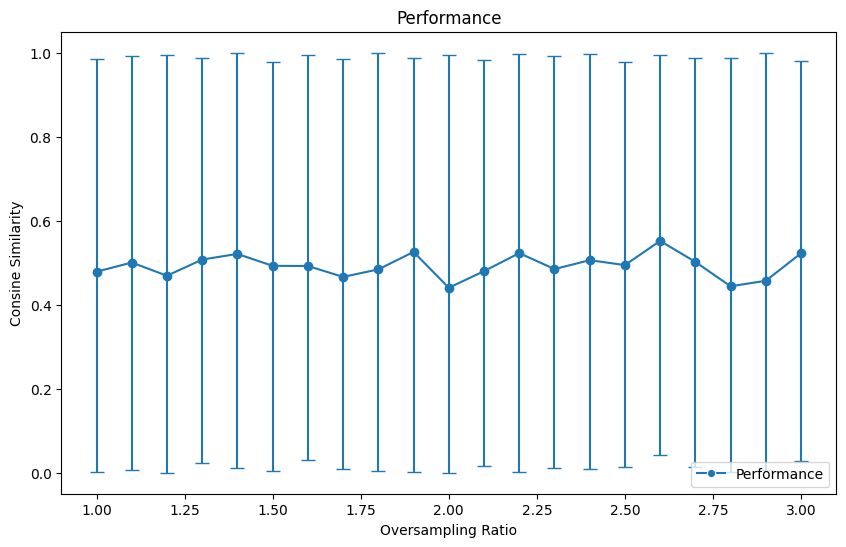

In [ ]:
plot_error_bars([df['oversampling']],[df.filter(like='test')],['Performance'])

# Understanding FFT

tensor([[[[1.0000, 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000, 1.0000]]]])
tensor([[[[2.3490, 0.4707, 0.3659, 0.7046],
          [1.4329, 0.3713, 1.1114, 1.0198],
          [0.1271, 1.1798, 0.6115, 1.2876],
          [1.0342, 0.6589, 0.1579, 0.4423]]]])


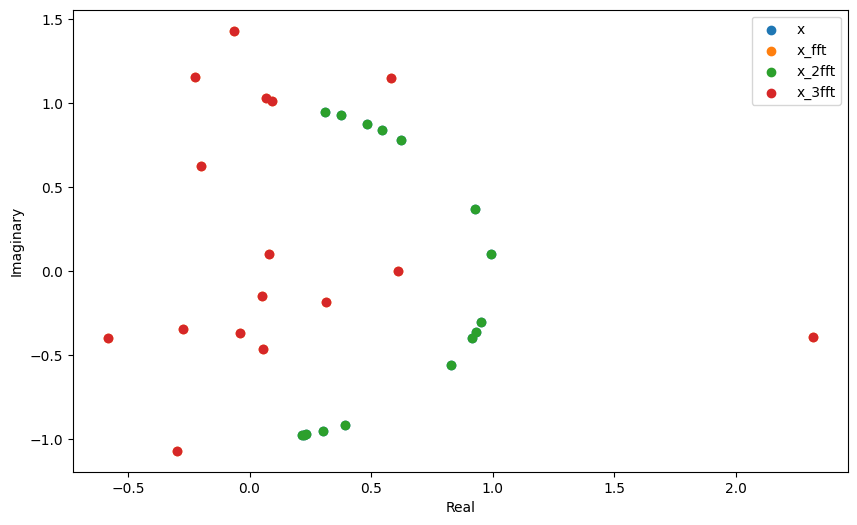

In [51]:
x = torch.rand((1,1,4,4))
x = torch.exp(1j*torch.pi*x - 1j*torch.pi/2)
#print(x.abs())
x_fft = torch.fft.fft2(x,norm='ortho')
#print(x_fft.abs())
x_2fft = torch.fft.fft2(x_fft,norm='ortho')
print(x_2fft.abs())
x_3fft = torch.fft.fft2(x_2fft,norm='ortho')
print(x_3fft.abs())
# plot the complex elements of x and x_fft in the same plot with different colors
plt.figure(figsize=(10, 6))
plt.scatter(x.real, x.imag, label='x')
plt.scatter(x_fft.real, x_fft.imag, label='x_fft')
plt.scatter(x_2fft.real, x_2fft.imag, label='x_2fft')
plt.scatter(x_3fft.real, x_3fft.imag, label='x_3fft')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()
plt.show()

var of x:  tensor(0.1494)
mean of x:  tensor(0.0714-0.3465j)
var of x_fft:  tensor(0.2267)
mean of x_fft:  tensor(-0.1034-0.2378j)
var of x_2fft:  tensor(0.1494)
mean of x_2fft:  tensor(0.0714-0.3465j)
tensor([-0.2068-0.4756j,  0.2983-0.0609j,  0.4178-0.3957j, -0.2238-0.4539j])
tensor([ 0.1428-0.6931j, -0.1158-0.3010j,  0.0682-0.1782j, -0.5088+0.2211j])
tensor([-0.2068-0.4756j, -0.2238-0.4539j,  0.4178-0.3957j,  0.2983-0.0609j])
tensor([ 0.1428-0.6931j, -0.5088+0.2211j,  0.0682-0.1782j, -0.1158-0.3010j])
tensor([-0.2068-0.4756j,  0.2983-0.0609j,  0.4178-0.3957j, -0.2238-0.4539j])


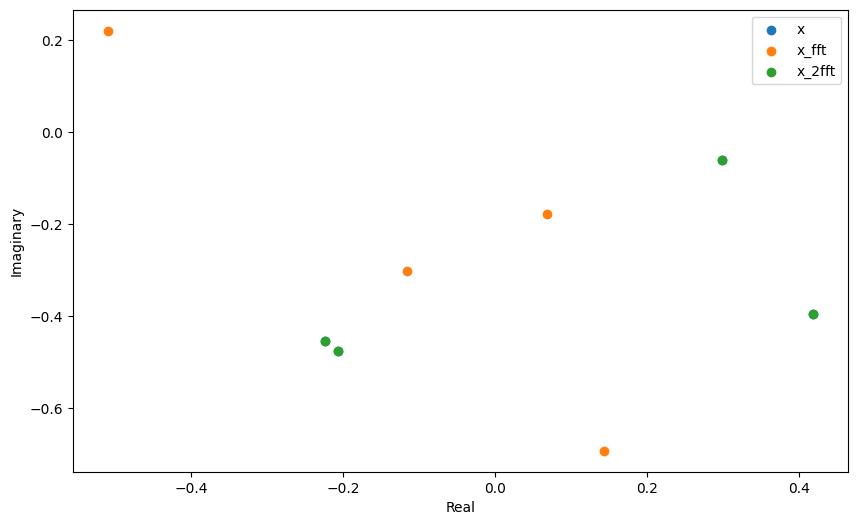

In [116]:
# use laplace distribution
distribution = torch.distributions.studentT.StudentT(5,0,1)
x = distribution.sample((4,)) + 1j*distribution.sample((4,))
x_fft = torch.fft.fft(x,norm='ortho')
x_2fft = torch.fft.fft(x_fft,norm='ortho')
x_3fft = torch.fft.fft(x_2fft,norm='ortho')
x_4fft = torch.fft.fft(x_3fft,norm='ortho')
print("var of x: ", x.var())
print("mean of x: ", x.mean())
print("var of x_fft: ", x_fft.var())
print("mean of x_fft: ", x_fft.mean())
print("var of x_2fft: ", x_2fft.var())
print("mean of x_2fft: ", x_2fft.mean())
print(x)
print(x_fft)
print(x_2fft)
print(x_3fft)
print(x_4fft)
plt.figure(figsize=(10, 6))
plt.scatter(x.real, x.imag, label='x')
plt.scatter(x_fft.real, x_fft.imag, label='x_fft')
plt.scatter(x_2fft.real, x_2fft.imag, label='x_2fft')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()
plt.show()

tensor(2.2485)
Selected GPU 2 with 31109 MB free memory 
theoretical value of mean of eigenvalues_X:  2.25
mean of eigenvalues_X:  tensor(2.2485+7.5500e-09j)
theoretical value of variance of eigenvalues_X:  3.1640625
variance of eigenvalues_X:  tensor(3.1568)


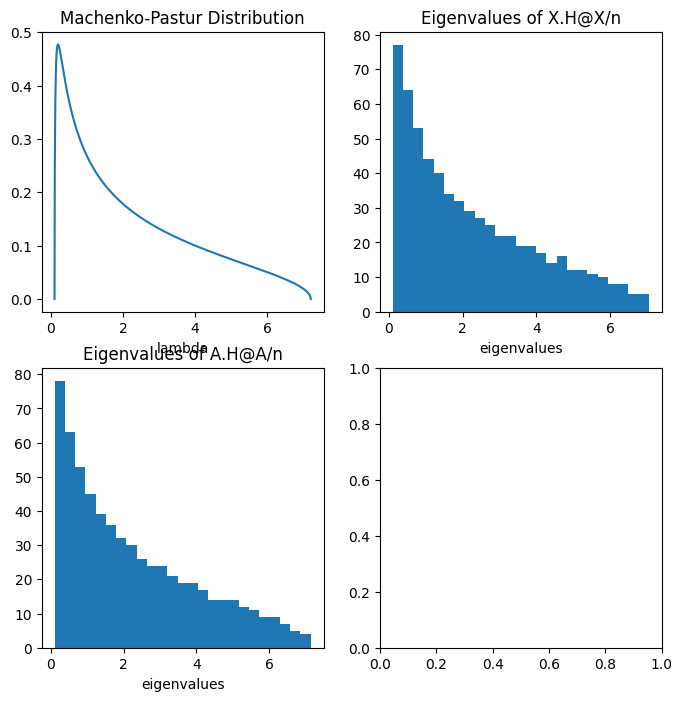

In [35]:
# Plot Machenko-Pastur distribution
import deepinv as dinv
import torch
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sigma = 1.5
m = 1000
sqrt_n = 25
n = sqrt_n**2
n_bins = 25
# reciprocal of oversampling ratio
gamma = n / m
# oversampling ratio
lamb = m / n
min_supp = sigma**2*(1-np.sqrt(gamma))**2
max_supp = sigma**2*(1+np.sqrt(gamma))**2

# Define the Machenko-Pastur distribution
def machenko_pastur(lamb, gamma, sigma):
    return np.sqrt((max_supp - lamb) * (lamb - min_supp)) / (2 * np.pi * sigma**2 * gamma * lamb)

# Define the range of s values
lambda_values = np.linspace(min_supp, max_supp, 1000)

# Calculate the distribution
distribution = machenko_pastur(lambda_values, gamma, sigma)

# sample a random matrix and compute its eigenvalues
X = sigma * torch.randn((m,n),dtype=torch.cfloat)
print(X.var())
eigenvalues_X, eigenvectors_X = torch.linalg.eig(X.conj().T@X/m)

# create a random phase retrieval model and compute its eigenvalues
physics = dinv.physics.RandomPhaseRetrieval(
    m=m,
    img_shape=(1, sqrt_n, sqrt_n),
    dtype=torch.cfloat,
    device=dinv.utils.get_freer_gpu() if torch.cuda.is_available() else "cpu",
    #device="cpu",
)

A = sigma * physics.B._A * np.sqrt(m)

# compute the eigenvalues of A
eigenvalues_A, eigenvectors_A = torch.linalg.eig(A.conj().T@A/m)

# theoretical value is sigma^2
print("theoretical value of mean of eigenvalues_X: ", sigma**2)
print("mean of eigenvalues_X: ", eigenvalues_X.mean())
# theoretical value is (1+gamma)sigma^4 - sigma^4
print("theoretical value of variance of eigenvalues_X: ", gamma*sigma**4)
# empirical value
print("variance of eigenvalues_X: ", eigenvalues_X.var())

# Plotting
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax[0,0].plot(lambda_values, distribution)
ax[0,0].set_xlabel('lambda')
ax[0,0].set_title('Machenko-Pastur Distribution')
ax[0,1].hist(eigenvalues_X.abs(), bins=n_bins)
ax[0,1].set_xlabel('eigenvalues')
ax[0,1].set_title('Eigenvalues of X.H@X/n')
ax[1,0].hist(eigenvalues_A.cpu().abs(), bins=n_bins)
ax[1,0].set_xlabel('eigenvalues')
ax[1,0].set_title('Eigenvalues of A.H@A/n')

plt.show()

# Does FFT change the variance of a random gaussianvector?

In [98]:
#
#! no it does not
x = 2*torch.randn((1000,1000))
x_fft = torch.fft.fft2(x,norm='ortho')
print(x.var())
print(x_fft.var())
# plt.hist(x.flatten().cpu(), bins=100)
# plt.show()
# plt.hist(x_fft.flatten().cpu(), bins=100)
# plt.show()

tensor(3.9985)
tensor(3.9985)


# Understanding torch distributions

In [1]:
import torch
import matplotlib.pyplot as plt

tensor(0.0009+0.0007j)
tensor(0.9974)


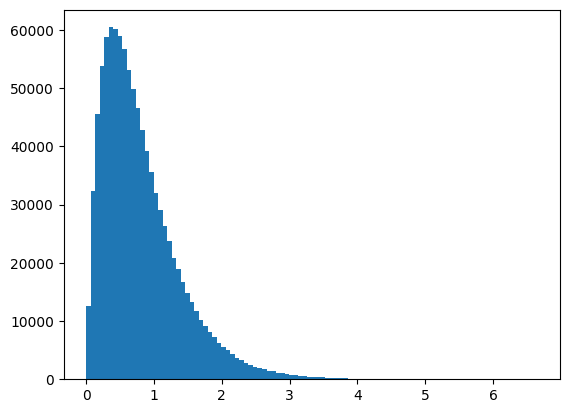

In [11]:
# laplace distribution
#! variance = 2*scale^2
laplace_dist = torch.distributions.laplace.Laplace(0,torch.tensor(0.5))
x = laplace_dist.sample((1000000,)) + 1j*laplace_dist.sample((1000000,))
print(x.mean())
print(x.var())
plt.hist(x.abs().flatten().cpu(), bins=100)
plt.show()

tensor(1.4719)
tensor(1300224.)
tensor(1011925.8125)
tensor(-287475.5938)


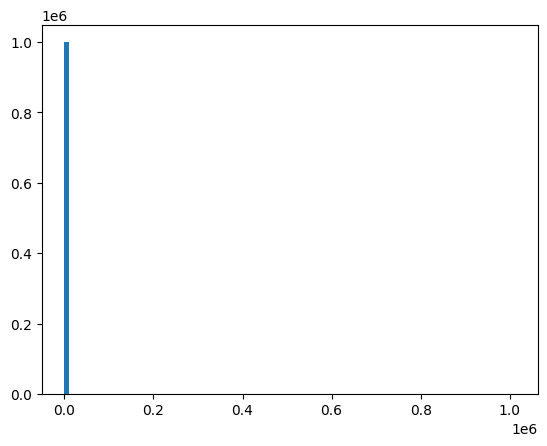

In [22]:
# cauchy distribution
#! variance is infinite
cauchy_dist = torch.distributions.cauchy.Cauchy(0,1)
x = cauchy_dist.sample((1000000,)) #+ 1j*cauchy_dist.sample((1000000,))
print(x.mean())
print(x.var())
print(x.max())
print(x.min())
plt.hist(x.abs().flatten().cpu(), bins=100)
plt.show()

tensor(-0.0016-0.0005j)
tensor(0.9985)


/home/zhhu/.conda/envs/deepinv/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/zhhu/.conda/envs/deepinv/lib/python3.9/site-packages/numpy/lib/histograms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/home/zhhu/.conda/envs/deepinv/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7004: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


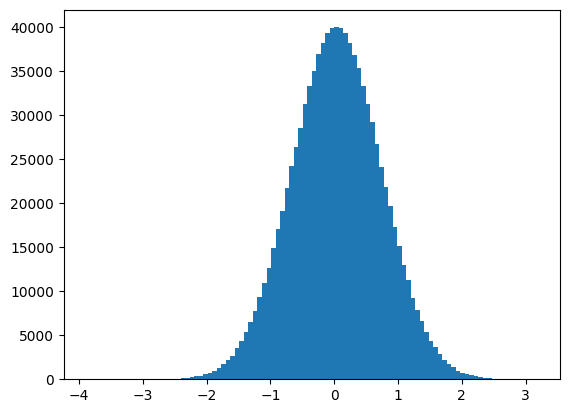

In [46]:
# student t distribution
#! variance = df/(df-2) if df > 2
#! variance is infinite if 1 < df <= 2
#! variance is undefined if df <=1 since the second moment is infinite
df = torch.tensor(100000.)
student_t_dist = torch.distributions.studentT.StudentT(df,0,1)
x = torch.sqrt((df-2)/df/2)*(student_t_dist.sample((1000000,)) + 1j*student_t_dist.sample((1000000,)))
print(x.mean())
print(x.var())
# print(x.max())
# print(x.min())
plt.hist(x.flatten().cpu(), bins=100)
plt.show()

# F^HDF = D?

In [7]:
import numpy as np

def fft_matrix(N):
    # Create a matrix of indices
    k = np.arange(N)
    n = k[:, np.newaxis]  # Create a column vector for broadcasting
    
    # Compute the FFT matrix using the formula
    F = np.exp(-2j * np.pi * k * n / N) / np.sqrt(N)
    
    return F

# set numpy print options to display only 4 decimal places
np.set_printoptions(formatter={'float': lambda x: "{:.2f}".format(x)})

# Example usage
N = 8  # Size of the FFT matrix
F = fft_matrix(N)
print(F.conj().T@F)

# D is a diagonal matrix
D = np.diag(np.arange(1,N+1))
print(D)
print(F.conj().T@D@F)

[[ 1.00000000e+00+0.00000000e+00j -7.10725970e-17-3.58849955e-17j
  -3.14155076e-17-2.21627898e-17j -2.60719176e-17+1.16770670e-16j
  -5.59278579e-18-6.12323400e-17j -2.85396306e-16-1.29253670e-16j
  -3.72213830e-16-8.88595126e-17j  4.22659742e-16+1.23096778e-16j]
 [-7.10725970e-17+3.58849955e-17j  1.00000000e+00+0.00000000e+00j
  -5.57067824e-17+1.61341845e-19j  1.87350135e-16-2.77555756e-17j
  -2.36796077e-17-2.77283964e-17j -3.46944695e-17+6.93889390e-17j
   1.21720571e-17+2.31040199e-16j  1.66533454e-16+1.45716772e-16j]
 [-3.14155076e-17+2.21627898e-17j -5.57067824e-17-1.61341845e-19j
   1.00000000e+00+0.00000000e+00j -3.15396717e-17-1.86632116e-16j
  -4.10024039e-17-2.78839785e-17j  2.80833278e-16-1.40277900e-16j
   0.00000000e+00-6.12323400e-17j  6.41222938e-16-2.95914652e-16j]
 [-2.60719176e-17-1.16770670e-16j  1.87350135e-16+2.77555756e-17j
  -3.15396717e-17+1.86632116e-16j  1.00000000e+00+0.00000000e+00j
  -5.23670889e-17+1.52682845e-16j -6.10622664e-16-2.56739074e-16j
  -2.52

# Sample from Marchenko-Pastur distribution

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Marchenko-Pastur parameters
m = 3000  # Number of rows
n = 1000  # Number of columns
sigma = 1  # Standard deviation of the entries
a = m/n
# reciprocal of oversampling ratio
gamma = n / m
# oversampling ratio
lamb = m / n
min_supp = sigma**2*(1-np.sqrt(gamma))**2
max_supp = sigma**2*(1+np.sqrt(gamma))**2

# Define the Machenko-Pastur distribution
def machenko_pastur(lamb, gamma, sigma):
    return np.sqrt((max_supp - lamb) * (lamb - min_supp)) / (2 * np.pi * sigma**2 * gamma * lamb)

# Compute bounds
b1 = sigma**2 * (1 + np.sqrt(a))**2
b2 = sigma**2 * (1 - np.sqrt(a))**2

# Define the Marchenko-Pastur PDF
def marchenko_pastur_pdf(x):
    if type(x) == np.ndarray and x.shape != ():
        return (1 / (2 * np.pi * sigma**2)) * np.sqrt((b1 - x) * (x - b2))

    if b2 < x < b1:
        return (1 / (2 * np.pi * sigma**2)) * np.sqrt((b1 - x) * (x - b2))
    else:
        return 0

# Maximum value of the PDF for rejection sampling
x_values = np.linspace(b2, b1, 10000)
pdf_values = marchenko_pastur_pdf(x_values)
max_pdf_value = np.max(pdf_values)

# Acceptance-Rejection Sampling
def acceptance_rejection_sampling(distribution,num_samples):
    samples = []
    while len(samples) < num_samples:
        x = np.random.uniform(b2, b1)  # Sample from the proposal
        y = np.random.uniform(0, max_pdf_value)  # Sample a height

        if y < marchenko_pastur_pdf(x):  # Acceptance condition
            samples.append(x)
    return np.array(samples)

# Generate samples
num_samples = 10000
samples = acceptance_rejection_sampling(num_samples)

# Plot histogram of the samples
plt.hist(samples, bins=50, density=True, alpha=0.5, label='Sampled Data')
plt.plot(x_values, pdf_values, label='Marchenko-Pastur PDF', color='red')
plt.title('Sampling from the Marchenko-Pastur Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

TypeError: acceptance_rejection_sampling() missing 1 required positional argument: 'num_samples'

In [1]:
class MarchenkoPastur:
    def __init__(self,m,n,sigma=None):
        self.m = m
        self.n = n
        self.gamma = n / m
        if sigma is not None:
            self.sigma = sigma
        else:
            # automatically set sigma to make E[|x|^2] = 1
            self.sigma = (1+self.gamma)**(-0.25)
        self.lamb = m / n
        self.min_supp = self.sigma**2*(1-np.sqrt(self.gamma))**2
        self.max_supp = self.sigma**2*(1+np.sqrt(self.gamma))**2
        self.max_pdf = None
    
    def pdf(self,x):
        assert (x >= self.min_supp).all() and (x <= self.max_supp).all(), "x is out of the support of the distribution"
        return np.sqrt((self.max_supp - x) * (x - self.min_supp)) / (2 * np.pi * self.sigma**2 * self.gamma * x)
    
    def sample(self,num_samples):
        """using acceptance-rejection sampling"""
        # compute the maximum value of the pdf if not yet computed
        if self.max_pdf is None:
            self.max_pdf = np.max(self.pdf(np.linspace(self.min_supp,self.max_supp,10000)))
        
        samples = []
        while len(samples) < num_samples:
            x = np.random.uniform(self.min_supp, self.max_supp, size=1)
            y = np.random.uniform(0, self.max_pdf, size=1)
            if y < self.pdf(x):
                samples.append(x)
        return np.array(samples)
    
    def mean(self):
        return self.sigma**2
    
    def var(self):
        return self.gamma*self.sigma**4

theoretical mean:  0.9701425001453319
empirical mean:  0.9686528060085102
theoretical variance:  0.0588235294117647
empirical variance:  0.05890705464539898
0.9971953132335596
1.0


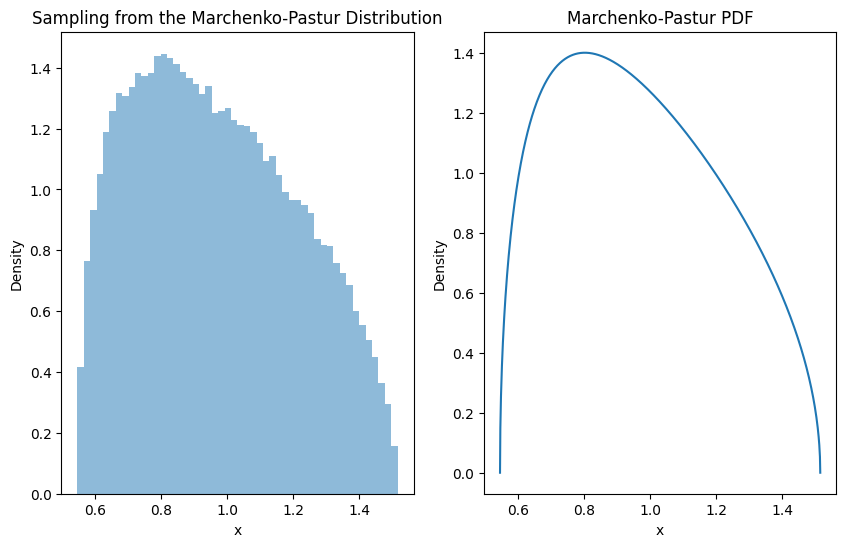

In [3]:
m = 10000
n = 25**2
num_samples = 100000

distribution = MarchenkoPastur(m,n)
samples = distribution.sample(num_samples)
print("theoretical mean: ", distribution.mean())
print("empirical mean: ", samples.mean())
print("theoretical variance: ", distribution.var())
print("empirical variance: ", samples.var())
print(samples.mean()**2 + samples.var())
print(distribution.mean()**2 + distribution.var())
pdf_values = distribution.pdf(np.linspace(distribution.min_supp,distribution.max_supp,1000))
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].hist(samples, bins=50, density=True, alpha=0.5, label='Sampled Data')
ax[0].set_title('Sampling from the Marchenko-Pastur Distribution')
ax[0].set_xlabel('x')
ax[0].set_ylabel('Density')
ax[1].plot(np.linspace(distribution.min_supp,distribution.max_supp,1000),pdf_values)
ax[1].set_xlabel('x')
ax[1].set_ylabel('Density')
ax[1].set_title('Marchenko-Pastur PDF')
plt.show()

In [7]:
np.linspace(distribution.min_supp,distribution.max_supp,1000)

array([0.54570516, 0.54667627, 0.54764738, 0.5486185 , 0.54958961,
       0.55056072, 0.55153184, 0.55250295, 0.55347407, 0.55444518,
       0.55541629, 0.55638741, 0.55735852, 0.55832963, 0.55930075,
       0.56027186, 0.56124297, 0.56221409, 0.5631852 , 0.56415631,
       0.56512743, 0.56609854, 0.56706966, 0.56804077, 0.56901188,
       0.569983  , 0.57095411, 0.57192522, 0.57289634, 0.57386745,
       0.57483856, 0.57580968, 0.57678079, 0.57775191, 0.57872302,
       0.57969413, 0.58066525, 0.58163636, 0.58260747, 0.58357859,
       0.5845497 , 0.58552081, 0.58649193, 0.58746304, 0.58843416,
       0.58940527, 0.59037638, 0.5913475 , 0.59231861, 0.59328972,
       0.59426084, 0.59523195, 0.59620306, 0.59717418, 0.59814529,
       0.59911641, 0.60008752, 0.60105863, 0.60202975, 0.60300086,
       0.60397197, 0.60494309, 0.6059142 , 0.60688531, 0.60785643,
       0.60882754, 0.60979865, 0.61076977, 0.61174088, 0.612712  ,
       0.61368311, 0.61465422, 0.61562534, 0.61659645, 0.61756

tensor(0.4921)


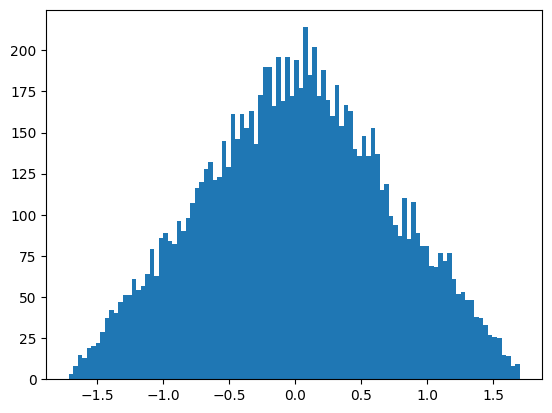

In [152]:
import torch

def triangular_distribution(a, size):
    u = torch.rand(size)  # Sample from uniform distribution [0, 1]
    
    # Apply inverse transform method for triangular distribution
    condition = (u < 0.5)
    samples = torch.zeros(size)
    
    # Left part of the triangular distribution
    samples[condition] = -a + torch.sqrt(u[condition] * 2 * a**2)
    
    # Right part of the triangular distribution
    samples[~condition] = a - torch.sqrt((1 - u[~condition]) * 2 * a**2)
    
    return samples

# Example usage
a = np.sqrt(3)  # Lower limit
size = (10000,)  # Number of samples

samples = triangular_distribution(a, size)
print(samples.var())
plt.hist(samples.flatten().cpu(),bins=100)
plt.show()

In [160]:
(np.sqrt(12)*(np.random.rand(10000) - 0.5)).var()

0.9808813228446698

In [163]:
from dotmap import DotMap

# Example YAML-like config loaded into DotMap
config_data = {
    'distribution': {
        'mode': 'normal',
        'shape': [1000],
        'config': {
            'mean': 0,
            'std': 1
        }
    }
}

# Convert config dictionary to DotMap
config = DotMap(config_data)

type(config.distribution)

dotmap.DotMap